In [5]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [6]:
dataset_name = 'computer_hardware'
shapes = {
    'S': (5,4,2),
    'V2': (3,)
}
epochs = 200
num_tries = 6

random_seed = 42
random_seeds = random.sample(range(0, 4294967295), num_tries)
curr_try = -1

def datasets_generator_fun():
    global curr_try
    global random_seeds
    global dataset_name
    curr_try += 1
    curr_try = curr_try % num_tries
    return get_validation_datasets(dataset_name, random_seed=random_seeds[curr_try], feature_range=(0,1), test_ratio=0)
    
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([6], [1])


### S(X,X,X)

Average elapsed k-fold validation time: 137.65221 sec
Last measures: [0.048673518002033234, 0.000551538192667067, 0.013089803047478199, 0.018968995660543442, 0.05297333002090454, 0.048673518002033234, 0.0016100483480840921, 0.013089803047478199, 0.018968995660543442, 0.05297333002090454, 0.048673518002033234, 0.0031729815527796745, 0.013089803047478199, 0.001106846029870212, 0.05297333002090454, 0.048673518002033234, 0.001609373139217496, 0.0007528488058596849, 0.0009674247121438384, 0.05297333002090454, 0.003963571507483721, 0.0031729815527796745, 0.009053594432771206, 0.018968995660543442, 0.05297333002090454, 0.03598444536328316, 0.0031729815527796745, 0.0005108254263177514, 0.018968995660543442, 0.05297333002090454]
Loss history average: [0.02553959 0.02538855 0.02525949 0.02514666 0.02504878 0.02496461
 0.02489284 0.02483211 0.02478107 0.02473831 0.02470262 0.0246729
 0.02464817 0.02462757 0.02461034 0.0245958  0.02458339 0.02457259
 0.02456299 0.0245542  0.02454581 0.02453761 0.0

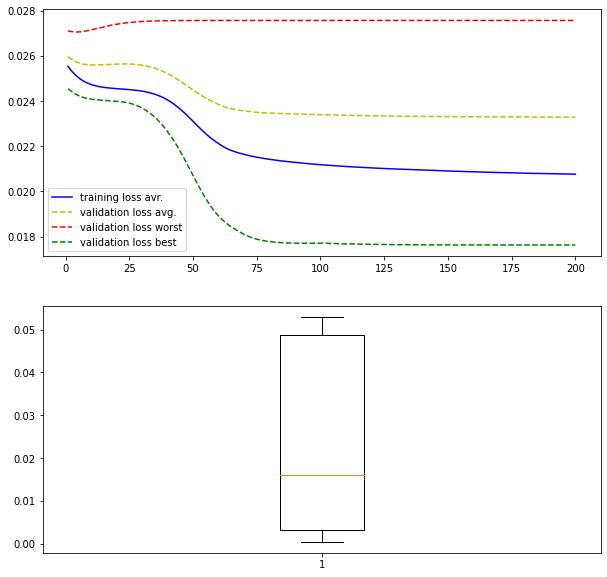

In [7]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=shapes['S'], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(2)

Average elapsed k-fold validation time: 153.67253 sec
Last measures: [0.048673518002033234, 0.0031729815527796745, 0.013089803047478199, 0.018968995660543442, 0.0409134179353714, 0.0037513410206884146, 0.0005813245661556721, 0.013089803047478199, 0.01127471774816513, 0.009684471413493156, 0.048673518002033234, 0.0005412710597738624, 0.008720840327441692, 0.018968995660543442, 0.00821266695857048, 0.003836267162114382, 0.0004565908166114241, 0.013089803047478199, 0.018968995660543442, 0.05297333002090454, 0.048673518002033234, 0.0007828677189536393, 0.013089803047478199, 0.0009381395648233593, 0.009722545742988586, 0.048673518002033234, 0.0003770423063542694, 0.00872071273624897, 0.0009121053735725582, 0.00890783965587616]
Loss history average: [0.02499327 0.02467548 0.02439993 0.02415747 0.02394635 0.02376486
 0.02361013 0.0234794  0.02336994 0.02327899 0.02320393 0.02314231
 0.02309191 0.02305076 0.02301718 0.02298969 0.0229671  0.02294838
 0.02293271 0.02291941 0.02290794 0.02289782 

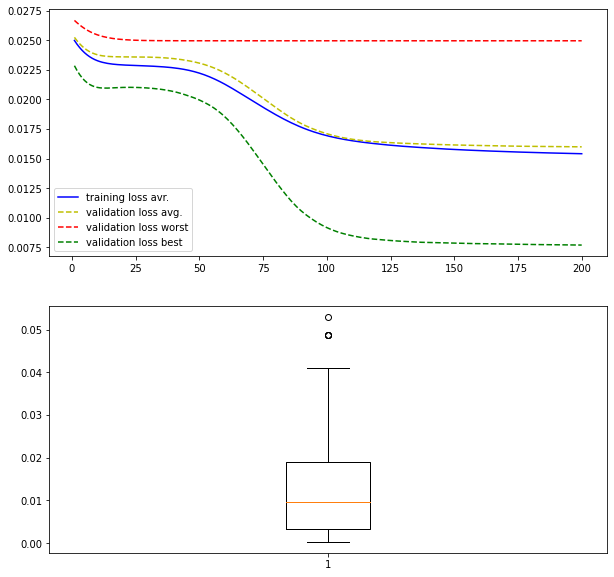

In [8]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(2)

Average elapsed k-fold validation time: 170.40697 sec
Last measures: [0.005105734337121248, 0.001971412915736437, 0.013089803047478199, 0.0021282804664224386, 0.05297333002090454, 0.048673518002033234, 0.0031729815527796745, 0.008720945566892624, 0.011274943128228188, 0.012365260161459446, 0.048673518002033234, 0.0031729815527796745, 0.013089803047478199, 0.0012783327838405967, 0.05297333002090454, 0.008097691461443901, 0.0031729815527796745, 0.013089803047478199, 0.0012477508280426264, 0.05297333002090454, 0.00446749571710825, 0.0005317972390912473, 0.013089803047478199, 0.018968995660543442, 0.05297333002090454, 0.048673518002033234, 0.0031729815527796745, 0.013089803047478199, 0.018968995660543442, 0.05297333002090454]
Loss history average: [0.02533025 0.02518983 0.02507308 0.02497297 0.02488809 0.02481704
 0.02475829 0.02471025 0.02467133 0.02464005 0.02461506 0.02459521
 0.02457949 0.02456704 0.02455718 0.02454935 0.02454307 0.02453801
 0.02453387 0.02453045 0.02452755 0.02452507 

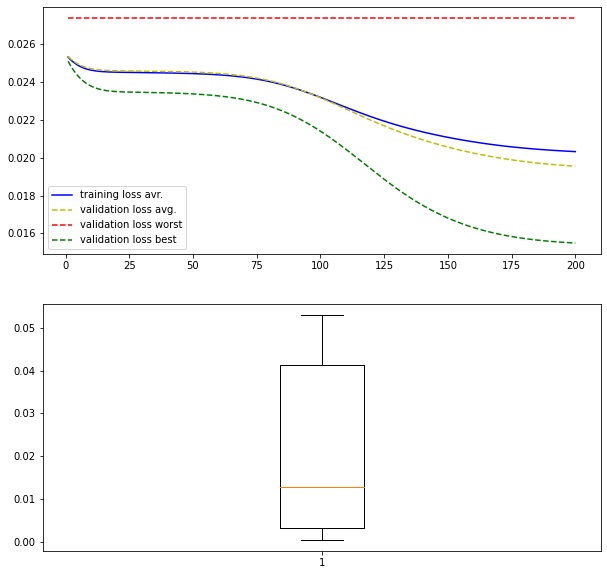

In [9]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)